In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://downloads.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz

!tar -xvf spark-3.5.1-bin-hadoop3.tgz

!pip install -q findspark


import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

import findspark

findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

from google.colab import files

#uploaded = files.upload()
#upload files test2_new.txt, output3.txt

import pandas as pd
import numpy as np
import csv
import sys
import subprocess

from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
import matplotlib.pyplot as plt
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.tuning import CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import MultilayerPerceptronClassifier


"""
import torch
import torch.nn as nn
import torch.optim as optim

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
"""


!pip install kaggle

spark-3.5.1-bin-hadoop3/
spark-3.5.1-bin-hadoop3/sbin/
spark-3.5.1-bin-hadoop3/sbin/spark-config.sh
spark-3.5.1-bin-hadoop3/sbin/stop-slave.sh
spark-3.5.1-bin-hadoop3/sbin/stop-mesos-dispatcher.sh
spark-3.5.1-bin-hadoop3/sbin/start-workers.sh
spark-3.5.1-bin-hadoop3/sbin/start-slaves.sh
spark-3.5.1-bin-hadoop3/sbin/start-all.sh
spark-3.5.1-bin-hadoop3/sbin/stop-all.sh
spark-3.5.1-bin-hadoop3/sbin/workers.sh
spark-3.5.1-bin-hadoop3/sbin/start-mesos-dispatcher.sh
spark-3.5.1-bin-hadoop3/sbin/spark-daemon.sh
spark-3.5.1-bin-hadoop3/sbin/decommission-worker.sh
spark-3.5.1-bin-hadoop3/sbin/slaves.sh
spark-3.5.1-bin-hadoop3/sbin/stop-mesos-shuffle-service.sh
spark-3.5.1-bin-hadoop3/sbin/stop-history-server.sh
spark-3.5.1-bin-hadoop3/sbin/stop-worker.sh
spark-3.5.1-bin-hadoop3/sbin/decommission-slave.sh
spark-3.5.1-bin-hadoop3/sbin/stop-thriftserver.sh
spark-3.5.1-bin-hadoop3/sbin/start-worker.sh
spark-3.5.1-bin-hadoop3/sbin/stop-slaves.sh
spark-3.5.1-bin-hadoop3/sbin/start-connect-server.sh


In [2]:
# upload kaggle.json api key from kaggle by going to settings > generate api key to /root/.kaggle folder by going up one level in the file directory and find it
# if the .kaggle folder is not in root then make it
!chmod 600 /root/.kaggle/kaggle.json

In [16]:

ratings_df = pd.read_csv('test2_new.txt', sep="|", header=None)
ratings_df.rename(columns = {0:'UserID', 1:'TrackID', 2:'Rating'}, inplace = True)
test_df = pd.read_csv('output3.txt', sep="|")
print(test_df.head())
esh =pd.read_csv('output4.txt', sep="|")
print(esh.head())
print(esh["Unnamed: 0"])
esh.rename(columns = {"Unnamed: 0": "UserID", "UserID": "TrackID", "TrackID": "FormatRating"}, inplace = True)
features = ["FormatRating","AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore", "RangeGenre", "AverageTrack", "Num100Track", "Num90Track", "Num80Track", "Num70Track", "Num60Track", "Num50Track", "SumTrack", "VarianceTrack", "NumRatedTrack" ,"AverageAlbum", "Num100Album", "Num90Album", "Num80Album", "Num70Album", "Num60Album", "Num50Album", "SumAlbum", "VarianceAlbum", "NumRatedAlbum", "AverageArtist", "Num100Artist", "Num90Artist", "Num80Artist", "Num70Artist", "Num60Artist", "Num50Artist", "SumArtist","VarianceArtist","NumRatedArtist" ]
for feature in features:
  esh[feature] = esh[feature].fillna(0)
print(esh.head())
esh["RatingValue"].update(test_df["RatingValue"])
new_features = ["RangeGenre", "AverageTrack", "Num100Track", "Num90Track", "Num80Track", "Num70Track", "Num60Track", "Num50Track", "SumTrack", "VarianceTrack", "NumRatedTrack" ,"AverageAlbum", "Num100Album", "Num90Album", "Num80Album", "Num70Album", "Num60Album", "Num50Album", "SumAlbum", "VarianceAlbum", "NumRatedAlbum", "AverageArtist", "Num100Artist", "Num90Artist", "Num80Artist", "Num70Artist", "Num60Artist", "Num50Artist", "SumArtist","VarianceArtist","NumRatedArtist" ]
for i in range(len(esh)):
  for feature in new_features:
    esh.at[i,"RatingValue"] += esh.at[i,feature] # need to update rating value with new features because of nan issues
print("New Features updated RatingValue")
print(esh.head())
train_df = ratings_df.merge(esh)
print("train_df")
print(train_df.head())
print(ratings_df.dtypes)
print(esh.dtypes)

   UserID  TrackID  AlbumRating  ArtistRating  Genre1Rating  Genre2Rating  \
0  199810   208019          0.0           0.0           0.0           0.0   
1  199810    74139          0.0           0.0           0.0          80.0   
2  199810     9903          0.0           0.0           0.0           0.0   
3  199810   242681          0.0           0.0           0.0           0.0   
4  199810    18515          0.0          70.0           0.0           0.0   

   Genre3Rating  Genre4Rating  Genre5Rating  Genre6Rating  Genre7Rating  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   NumberRatedGenres  MaxGenreScore  MinGenreScore  SumGenreScores  \
0               

In [20]:
"""
ratings_df = pd.read_csv('test2_new.txt', sep="|", header=None)
test_df = pd.read_csv('output4.txt', sep="|")
ratings_df.rename(columns = {0:'UserID', 1:'TrackID', 2:'Rating'}, inplace = True)
print(test_df)
train_df = ratings_df.merge(test_df)
print(train_df)
"""
features = ["FormatRating","AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore", "RangeGenre", "AverageTrack", "Num100Track", "Num90Track", "Num80Track", "Num70Track", "Num60Track", "Num50Track", "SumTrack", "VarianceTrack", "NumRatedTrack" ,"AverageAlbum", "Num100Album", "Num90Album", "Num80Album", "Num70Album", "Num60Album", "Num50Album", "SumAlbum", "VarianceAlbum", "NumRatedAlbum", "AverageArtist", "Num100Artist", "Num90Artist", "Num80Artist", "Num70Artist", "Num60Artist", "Num50Artist", "SumArtist","VarianceArtist","NumRatedArtist", "RatingValue" ]
sub_train_df = train_df[["FormatRating", "AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" , "RangeGenre", "AverageTrack", "Num100Track", "Num90Track", "Num80Track", "Num70Track", "Num60Track", "Num50Track", "SumTrack", "VarianceTrack", "NumRatedTrack" ,"AverageAlbum", "Num100Album", "Num90Album", "Num80Album", "Num70Album", "Num60Album", "Num50Album", "SumAlbum", "VarianceAlbum", "NumRatedAlbum", "AverageArtist", "Num100Artist", "Num90Artist", "Num80Artist", "Num70Artist", "Num60Artist", "Num50Artist", "SumArtist","VarianceArtist","NumRatedArtist", "RatingValue" ]]
sub_train_df = pd.concat([sub_train_df, ratings_df["Rating"]], axis="columns")
sub_train_df = spark.createDataFrame(sub_train_df)
sub_train_df.show()
sub_test_df = esh[["UserID", "TrackID", "FormatRating", "AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" , "RangeGenre", "AverageTrack", "Num100Track", "Num90Track", "Num80Track", "Num70Track", "Num60Track", "Num50Track", "SumTrack", "VarianceTrack", "NumRatedTrack" ,"AverageAlbum", "Num100Album", "Num90Album", "Num80Album", "Num70Album", "Num60Album", "Num50Album", "SumAlbum", "VarianceAlbum", "NumRatedAlbum", "AverageArtist", "Num100Artist", "Num90Artist", "Num80Artist", "Num70Artist", "Num60Artist", "Num50Artist", "SumArtist","VarianceArtist","NumRatedArtist", "RatingValue" ]]
sub_test_df = spark.createDataFrame(sub_test_df)
sub_test_df.show()

+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+------------------+------------------+------------------+-----------------+------------+-----------+----------+----------+----------+----------+----------+-----------------+-------------+-------------+------------+-----------+----------+----------+----------+----------+----------+--------+-------------+-------------+-------------+------------+-----------+-----------+-----------+-----------+-----------+---------+--------------+--------------+------------------+------+
|FormatRating|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|    SumGenreScores| AverageGenreScore|VarianceGenreScore|       RangeGenre|AverageTrack|Num100Track|Num90Track|Num80Track|Num70Track|Num60Track|Num50Track|         SumTrack|Var

In [ ]:
# for testing purposes only
"""
print(ratings_df.head(10))
print(test_df.head(10))
print(len(ratings_df))
print(len(test_df))
#train_df = test_df[["UserID", "TrackID"]]
train_df = ratings_df.merge(test_df)
print(train_df.head(10))
print(len(train_df))
#esh = test_df.query('UserID == 200031')
#print(esh)
# DROP USERID AND TRACKID FOR TRAINING AND POSSIBLY MOVE RATINGS COLUMN TO END
#sub_train_df = train_df[["AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" ]]
print(sub_train_df.head(10))
print(sub_train_df.dtypes)
"""

In [21]:
# possibly add standard scaler
features = ["FormatRating","AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore", "RangeGenre", "AverageTrack", "Num100Track", "Num90Track", "Num80Track", "Num70Track", "Num60Track", "Num50Track", "SumTrack", "VarianceTrack", "NumRatedTrack" ,"AverageAlbum", "Num100Album", "Num90Album", "Num80Album", "Num70Album", "Num60Album", "Num50Album", "SumAlbum", "VarianceAlbum", "NumRatedAlbum", "AverageArtist", "Num100Artist", "Num90Artist", "Num80Artist", "Num70Artist", "Num60Artist", "Num50Artist", "SumArtist","VarianceArtist","NumRatedArtist", "RatingValue" ]
assembler = VectorAssembler(inputCols=features, outputCol='Features')
sub_train_df = assembler.transform(sub_train_df)
sub_test_df = assembler.transform(sub_test_df)
"""
pipeline = Pipeline(stages = assembler)
pipelineModel = pipeline.fit(sub_train_df)
sub_train_df = pipelineModel.transform(sub_train_df)
"""
sub_train_df.show()
sub_test_df.show()

+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+------------------+------------------+------------------+-----------------+------------+-----------+----------+----------+----------+----------+----------+-----------------+-------------+-------------+------------+-----------+----------+----------+----------+----------+----------+--------+-------------+-------------+-------------+------------+-----------+-----------+-----------+-----------+-----------+---------+--------------+--------------+------------------+------+--------------------+
|FormatRating|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|    SumGenreScores| AverageGenreScore|VarianceGenreScore|       RangeGenre|AverageTrack|Num100Track|Num90Track|Num80Track|Num70Track|Num60Track|Num50Track|

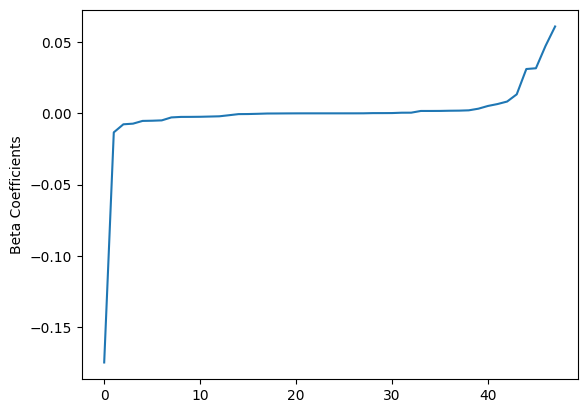

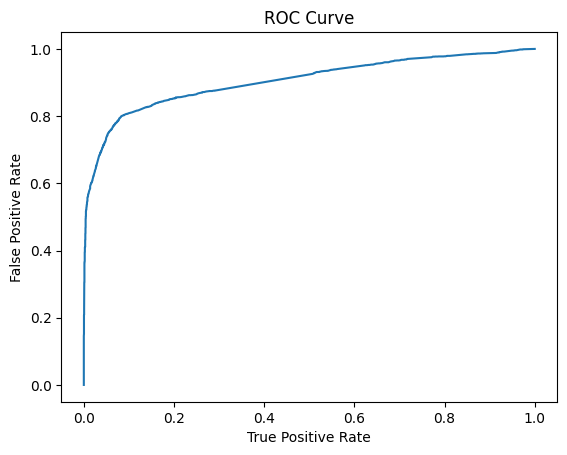

Training set areaUnderROC: 0.9045448333333329
+------+-------+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+------------------+------------------+------------------+-----------------+------------+-----------+----------+----------+----------+----------+----------+-----------------+-------------+-------------+------------+-----------+----------+----------+----------+----------+----------+--------+-------------+-------------+-------------+------------+-----------+-----------+-----------+-----------+-----------+---------+--------------+--------------+------------------+--------------------+--------------------+--------------------+----------+
|UserID|TrackID|FormatRating|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|    SumGenreScores| AverageGenreS

In [22]:
#Logistic Regression
iter = 10
reg = 0.0
aggregation = 5
standardize = True
elastic = 1
family = "auto"
fitIntercept = True
lr = LogisticRegression(featuresCol = "Features", labelCol = "Rating", maxIter=iter, regParam = reg, aggregationDepth = aggregation, standardization = standardize, elasticNetParam = elastic, family = family, fitIntercept = fitIntercept)
lrModel = lr.fit(sub_train_df)
beta = np.sort(lrModel.coefficients)
plt.plot(beta)
plt.ylabel("Beta Coefficients")
plt.show()
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc["FPR"],roc["TPR"])
plt.ylabel("False Positive Rate")
plt.xlabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("Training set areaUnderROC: " + str(trainingSummary.areaUnderROC))
predictions = lrModel.transform(sub_test_df)
predictions.show(10)
predictions.count()
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="prediction")
print("Test Area Under ROC", evaluator.evaluate(predictions))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_lr.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()

!kaggle competitions submit -c aai627-spring2024 -f myprediction1_kaggle_lr.csv -m "Logistic Regression Predictions maxIter = $iter, regParam = $reg, aggregationDepth = $aggregation, standardization = $standardize, elasticNetParam = $elastic, family = $family, fitIntercept = $fitIntercept"
!kaggle competitions submissions -c aai627-spring2024

In [23]:
# Decision Tree Classifier
depth = 2
criter="gini"
bins = 32
minInstances = 1
minInfo = 0.0
dt = DecisionTreeClassifier(featuresCol = "Features",
labelCol = "Rating", maxDepth = depth,  impurity = criter, maxBins = bins, minInstancesPerNode = minInstances, minInfoGain = minInfo)
dtModel = dt.fit(sub_train_df)
predictions = dtModel.transform(sub_test_df)
predictions.show(10)
print(predictions.count())
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="prediction")
print("Test Area Under ROC", evaluator.evaluate(predictions))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_dt.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()

!kaggle competitions submit -c aai627-spring2024 -f myprediction1_kaggle_dt.csv -m "Decision Tree Classifier Predictions maxDepth = $depth impurity = $criter maxBins = $bins, minInstancesPerNode = $minInstances, minInfoGain = $minInfo"
!kaggle competitions submissions -c aai627-spring2024

+------+-------+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+------------------+------------------+------------------+-----------------+------------+-----------+----------+----------+----------+----------+----------+-----------------+-------------+-------------+------------+-----------+----------+----------+----------+----------+----------+--------+-------------+-------------+-------------+------------+-----------+-----------+-----------+-----------+-----------+---------+--------------+--------------+------------------+--------------------+--------------+--------------------+----------+
|UserID|TrackID|FormatRating|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|    SumGenreScores| AverageGenreScore|VarianceGenreScore|       RangeGenre|AverageTra

In [24]:
# Random Forest Classifier
Trees = 50
depth = 2
rf = RandomForestClassifier(featuresCol = "Features", labelCol = "Rating", numTrees = Trees, maxDepth = depth)
rfModel = rf.fit(sub_train_df)
predictions = rfModel.transform(sub_test_df)
predictions.show()
print(predictions.count())
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="prediction")
print("Test Area Under ROC", evaluator.evaluate(predictions))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_rf.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()

!kaggle competitions submit -c aai627-spring2024 -f myprediction1_kaggle_rf.csv -m "Random Forest Classifier Predictions numTrees = $Trees, maxDepth = $depth"
!kaggle competitions submissions -c aai627-spring2024

+------+-------+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+------------------+------------------+------------------+-----------------+------------+-----------+----------+----------+----------+----------+----------+-----------------+-------------+-------------+------------+-----------+----------+----------+----------+----------+----------+--------+-------------+-----------------+-------------+------------+-----------+-----------+-----------+-----------+-----------+------------------+--------------+--------------+------------------+--------------------+--------------------+--------------------+----------+
|UserID|TrackID|FormatRating|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|    SumGenreScores| AverageGenreScore|VarianceGenreScore|       Ra

In [25]:
# Gradient Boosted Tree Classifier
iter = 50
gbt = GBTClassifier(featuresCol= "Features", labelCol= "Rating", maxIter=iter)
gbtModel = gbt.fit(sub_train_df)
predictions = gbtModel.transform(sub_test_df)
predictions.show()
print(predictions.count())
evaluator = BinaryClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="prediction")
print("Test Area Under ROC", evaluator.evaluate(predictions))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_gbt.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()

!kaggle competitions submit -c aai627-spring2024 -f myprediction1_kaggle_gbt.csv -m "Gradient Boosted Tree Classifier Predictions maxIter = $iter"
!kaggle competitions submissions -c aai627-spring2024

+------+-------+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+------------------+------------------+------------------+-----------------+------------+-----------+----------+----------+----------+----------+----------+-----------------+-------------+-------------+------------+-----------+----------+----------+----------+----------+----------+--------+-------------+-----------------+-------------+------------+-----------+-----------+-----------+-----------+-----------+------------------+--------------+--------------+------------------+--------------------+--------------------+--------------------+----------+
|UserID|TrackID|FormatRating|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|    SumGenreScores| AverageGenreScore|VarianceGenreScore|       Ra

In [26]:
# Multi-Layer Perceptron Classifier

iter = 100

first_hidden_layer_neurons = 128
second_hidden_layer_neurons = 64
output_layer_neurons = 10

layers = [len(features), first_hidden_layer_neurons, second_hidden_layer_neurons,output_layer_neurons]

mlp = MultilayerPerceptronClassifier(featuresCol= "Features", labelCol= "Rating", maxIter=iter, layers=layers)
mlpModel = mlp.fit(sub_train_df)
predictions = mlpModel.transform(sub_test_df)
predictions.show()

#evaluator = MulticlassClassificationEvaluator(rawPredictionCol="rawPrediction", labelCol="prediction", metricName = 'accuracy')
#print(evaluator.evaluate(predictions))

predictions_pandas = predictions.toPandas()
kaggle_output = 'myprediction1_kaggle_mlp.csv'
fOut_submission = open(kaggle_output, 'w')
csv_writer = csv.writer(fOut_submission)
header_submission = ["TrackID", "Predictor"]
csv_writer.writerow(header_submission)
for i in range(len(predictions_pandas)):
    csv_writer.writerow([f"{predictions_pandas['UserID'][i]}_{predictions_pandas['TrackID'][i]}", int(predictions_pandas["prediction"][i])])
fOut_submission.close()

!kaggle competitions submit -c aai627-spring2024 -f myprediction1_kaggle_mlp.csv -m "MultiLayerPerceptronClassifier Predictions maxIter = $iter first_hidden_layer_neurons = $first_hidden_layer_neurons second_hidden_layer_neurons = $second_hidden_layer_neurons output_layer_neurons = $output_layer_neurons"
!kaggle competitions submissions -c aai627-spring2024


+------+-------+------------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+-----------------+-------------+-------------+------------------+------------------+------------------+-----------------+------------+-----------+----------+----------+----------+----------+----------+-----------------+-------------+-------------+------------+-----------+----------+----------+----------+----------+----------+--------+-------------+-----------------+-------------+------------+-----------+-----------+-----------+-----------+-----------+------------------+--------------+--------------+------------------+--------------------+--------------------+--------------------+----------+
|UserID|TrackID|FormatRating|AlbumRating|ArtistRating|Genre1Rating|Genre2Rating|Genre3Rating|Genre4Rating|Genre5Rating|Genre6Rating|Genre7Rating|NumberRatedGenres|MaxGenreScore|MinGenreScore|    SumGenreScores| AverageGenreScore|VarianceGenreScore|       Ra

In [ ]:
# Neural Network Model testing

"""
features = ["AlbumRating", "ArtistRating", "Genre1Rating", "Genre2Rating", "Genre3Rating", "Genre4Rating", "Genre5Rating", "Genre6Rating", "Genre7Rating", "NumberRatedGenres", "MaxGenreScore", "MinGenreScore", "SumGenreScores", "AverageGenreScore", "VarianceGenreScore" ]

pandas_sub_train_df = sub_train_df.toPandas()
pandas_sub_test_df = sub_test_df.toPandas()



x_train = torch.tensor(pandas_sub_train_df[features].values, dtype=torch.float)
y_train = torch.tensor(pandas_sub_train_df["Rating"].values, dtype=torch.float)

x_test = torch.tensor(pandas_sub_test_df[features].values, dtype=torch.float)



model = nn.Sequential(
    nn.Linear(3,16),
    nn.ReLU(),
    nn.Linear(16,8),
    nn.ReLU(),
    nn.Linear(8,4),
    nn.ReLU(),
    nn.Linear(4,1)
)

loss = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr = 0.001)

num_epochs = 100
for epoch in range(num_epochs):
    predictions = model(x_train)
    MSE = loss(predictions, y_train)
    MSE.backward()
    optimizer.step()
    optimizer.zero_grad()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], MSE Loss: {MSE.item()}')


model.eval()
with torch.no_grad():
    predictions = model(X_test)


model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(sub_train_df, , epochs=100, batch_size=10)
"""

In [ ]:
# test block before implementing csv write outs
"""
predictions_pandas = predictions.toPandas()
predictions_pandas.head()
print(len(predictions_pandas))
print(predictions_pandas["UserID"][0])
print(predictions_pandas["UserID"][len(predictions_pandas)-1])
print(predictions_pandas["TrackID"][0])
print(predictions_pandas["TrackID"][len(predictions_pandas)-1])
print(predictions_pandas["prediction"][0])
print(predictions_pandas["prediction"][len(predictions_pandas)-1])
"""